# Example real world OSN use case

From work funded by the National Oceanic and Atmospheric Administration's RESTORE Science Program under award NA19NOS4510194 and developed by Lisa Lowe @ NC State

In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import folium

## Download and Read Station Data


Download a small CSV file that contains, at minimum,
- `Station`
- `Lat`
- `Lon`



In [4]:
!wget https://mghp.osn.xsede.org/cis220170-bucket01/mb_stations.csv

--2023-03-22 20:41:16--  https://mghp.osn.xsede.org/cis220170-bucket01/mb_stations.csv
Resolving mghp.osn.xsede.org (mghp.osn.xsede.org)... 192.69.103.248, 192.69.103.246, 192.69.103.247
Connecting to mghp.osn.xsede.org (mghp.osn.xsede.org)|192.69.103.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2904 (2.8K) [text/csv]
Saving to: ‘mb_stations.csv.1’

mb_stations.csv.1   100%[===================>]   2.84K  --.-KB/s    in 0s      

2023-03-22 20:41:16 (44.7 MB/s) - ‘mb_stations.csv.1’ saved [2904/2904]



In [5]:
#Read a CSV file that has 'Station', 'Lat', 'Lon'
station_file = "mb_stations.csv"
station_data = pd.read_csv(station_file)
#Define an array of locations
locations = station_data[['Lat', 'Lon']]
locationlist = locations.values.tolist()

## Map of our Study Area
Define the bounding box for your study area

In [6]:
## Define bounding box
latmin = 30.10
latmax = 30.96
lonmin = -88.75
lonmax = -87.4
## Tooltip for box
area_name = "Mobile Bay"

In [4]:
# Mobile Bay
#Define the base map
m = folium.Map(location=[30.50355, -87.98733], zoom_start=9)
#For each station location, draw a popup, add to base map
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=station_data['Station'][point]).add_to(m)
#Add a rectagle to the basemap
folium.Rectangle(bounds=[(latmin, lonmin ), (latmax, lonmax )],
                    fill=False,
                    color='blue',
                    tooltip=area_name
                   ).add_to(m)
#Draw the map
m

## Download and plot station data


In [7]:
!wget https://mghp.osn.xsede.org/cis220170-bucket01/MB6H.csv

--2023-03-22 20:43:30--  https://mghp.osn.xsede.org/cis220170-bucket01/MB6H.csv
Resolving mghp.osn.xsede.org (mghp.osn.xsede.org)... 192.69.103.247, 192.69.103.248, 192.69.103.246
Connecting to mghp.osn.xsede.org (mghp.osn.xsede.org)|192.69.103.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20462 (20K) [text/csv]
Saving to: ‘MB6H.csv’

MB6H.csv            100%[===================>]  19.98K  --.-KB/s    in 0.06s   

2023-03-22 20:43:30 (345 KB/s) - ‘MB6H.csv’ saved [20462/20462]



In [8]:
#Choose the file
data_file = "MB6H.csv"
#Read the data
df = pd.read_csv(data_file)
#Clean up the date
df['Date'] = pd.to_datetime(df['Date'])
#Make a Time variable
T = df['Date']
#Take a look
df.head()

,Date,Tsurf,Tbot,Ssurf,Sbot
0,2019-01-01,19.311464,19.753105,1.015475,3.760554
1,2019-01-02,19.613837,19.368593,0.057060,0.574622
2,2019-01-03,19.516460,19.479716,0.015782,0.015733
3,2019-01-04,18.922733,18.945956,0.022655,0.022923
4,2019-01-05,15.888723,15.914627,0.006817,0.007029


### The following plots model data of temperature and salinity at sea surface and bottom.

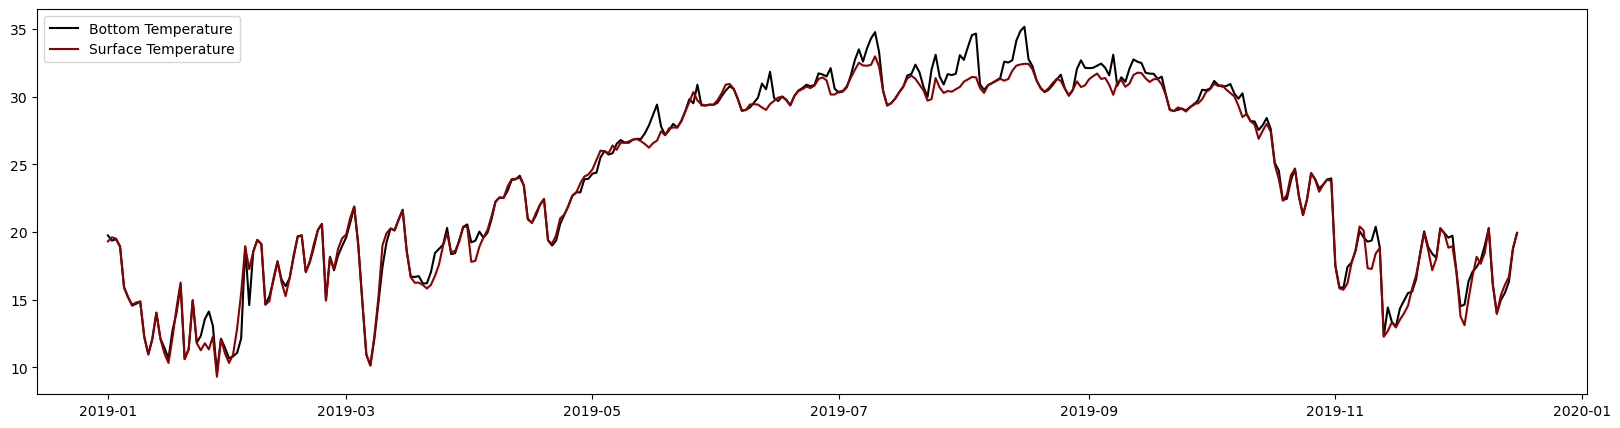

In [9]:
#Start the bounding box of the figure
fig, ax = plt.subplots(figsize=(20, 5))
#Add plots
ax.plot(T,df['Tbot'],color="black",label="Bottom Temperature")
ax.plot(T,df['Tsurf'],color="darkred",label="Surface Temperature")
#Add the legend
ax.legend(loc='upper left')

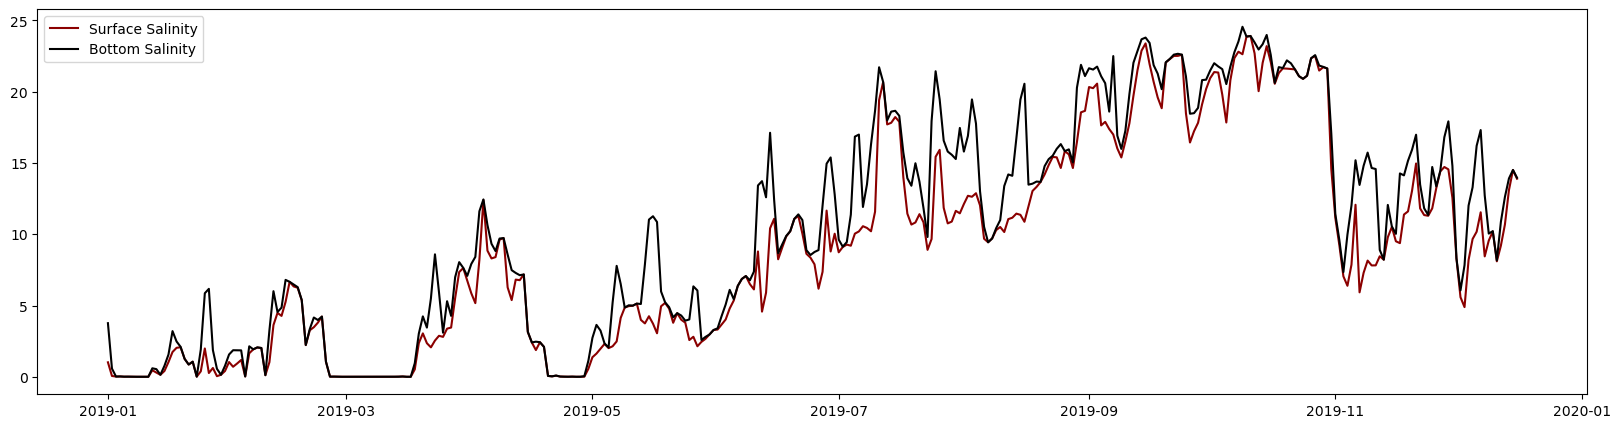

In [7]:
#Start the bounding box of the figure
fig, ax = plt.subplots(figsize=(20, 5))
#Add plots
ax.plot(T,df['Ssurf'],color="darkred",label="Surface Salinity")
ax.plot(T,df['Sbot'],color="black",label="Bottom Salinity")
#Add the legend
ax.legend(loc='upper left')

## Download another station data set

In [10]:
!wget https://renc.osn.xsede.org/ees210015-bucket01/hydrodynamics/ROMS_TS_csvFiles/MS3C.csv


--2023-03-22 20:45:09--  https://renc.osn.xsede.org/ees210015-bucket01/hydrodynamics/ROMS_TS_csvFiles/MS3C.csv
Resolving renc.osn.xsede.org (renc.osn.xsede.org)... 152.54.11.37, 152.54.11.38, 152.54.11.36
Connecting to renc.osn.xsede.org (renc.osn.xsede.org)|152.54.11.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515 (20K) [text/csv]
Saving to: ‘MS3C.csv.1’

MS3C.csv.1          100%[===================>]  20.03K  --.-KB/s    in 0.03s   

2023-03-22 20:45:10 (658 KB/s) - ‘MS3C.csv.1’ saved [20515/20515]



In [11]:
#Choose the file
data_file = "MS3C.csv"
#Read the data
df2 = pd.read_csv(data_file)
#Clean up the date
df2['Date'] = pd.to_datetime(df2['Date'])
#Make a Time variable
T = df2['Date']
#Take a look
df2.head()

,Date,Tsurf,Tbot,Ssurf,Sbot
0,2019-01-01,19.696731,18.382725,8.073683,23.897105
1,2019-01-02,19.651486,18.542590,6.485110,23.183693
2,2019-01-03,19.426775,18.737550,12.789852,22.133718
3,2019-01-04,18.632371,18.489000,16.826856,21.050102
4,2019-01-05,16.575761,16.822257,13.964052,16.852991


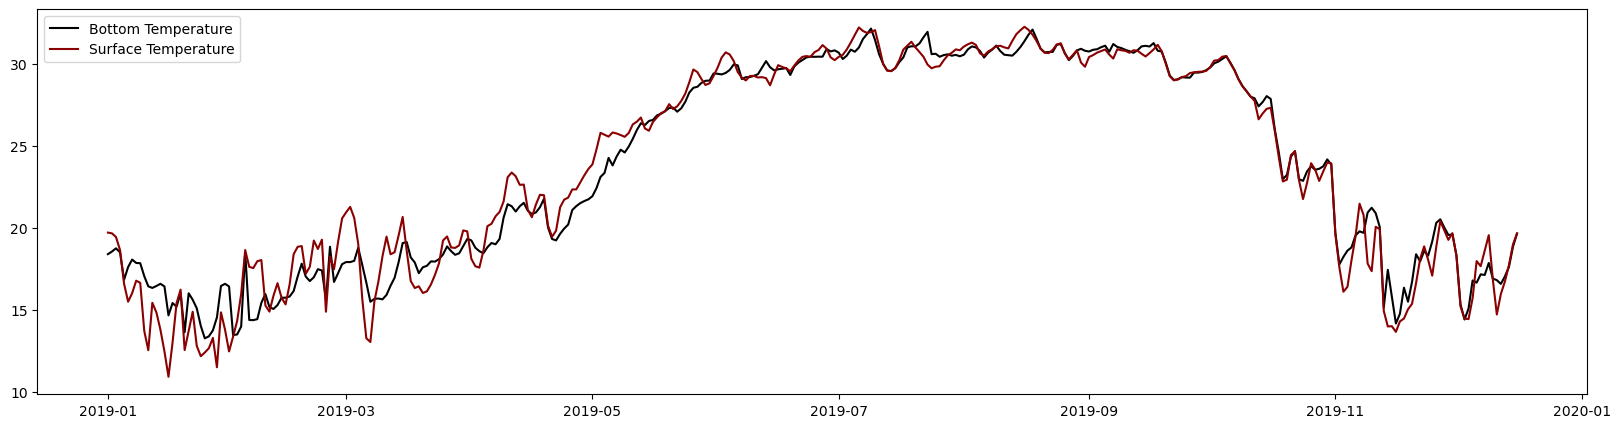

In [12]:
#Start the bounding box of the figure
fig, ax = plt.subplots(figsize=(20, 5))
#Add plots
ax.plot(T,df2['Tbot'],color="black",label="Bottom Temperature")
ax.plot(T,df2['Tsurf'],color="darkred",label="Surface Temperature")
#Add the legend
ax.legend(loc='upper left')

## Plot the difference in bottom temperature between the two stations

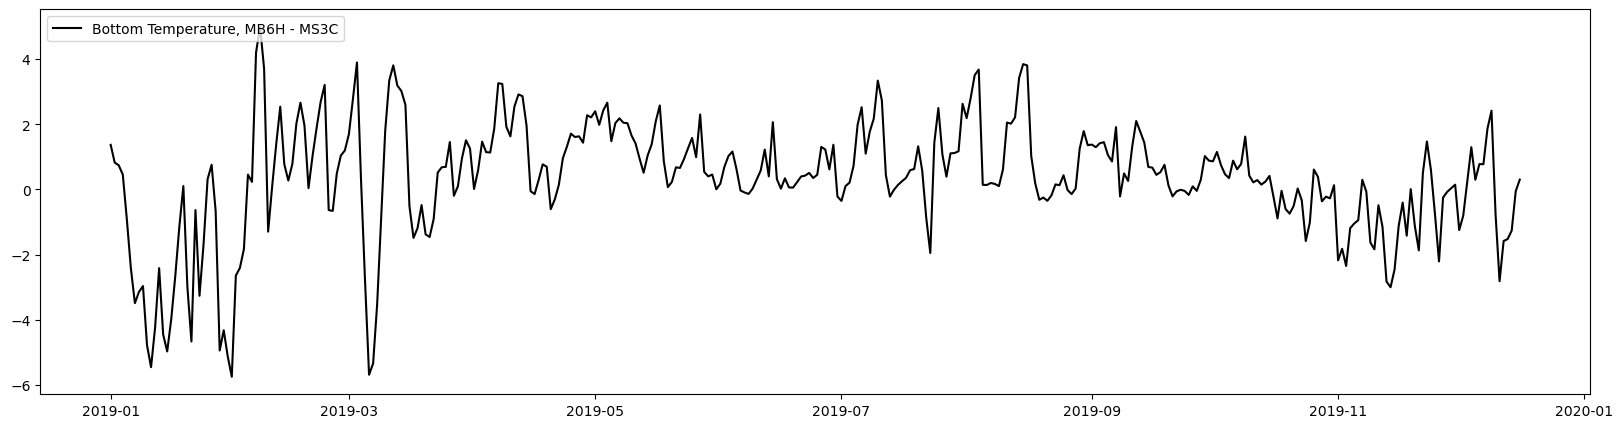

In [13]:
#Calculate difference
df_diff = df['Tbot']-df2['Tbot']
#Start the bounding box of the figure
fig, ax = plt.subplots(figsize=(20, 5))
#Add plots
ax.plot(T,df_diff,color="black",label="Bottom Temperature, MB6H - MS3C")
#Add the legend
ax.legend(loc='upper left')